## Simple Linear Regression for Data Science

Linear regression is a powerful modeling technique that can be used to understand the relationship between a quantitative variable and one or more other variables, sometimes with the goal of making predictions.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The first step before fitting a linear regression model is exploratory data analysis and data visualization: is there a relationship that we can model? 

In [44]:
students = pd.read_csv("./csv/students.csv")

# Write equation for a line
y = 9.85 * students.hours_studied + 43

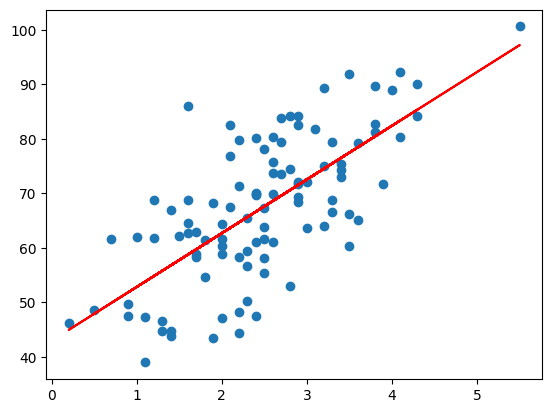

In [45]:
# create plot
plt.scatter(students.hours_studied, students.score)
plt.plot(students.hours_studied, y, "r")
plt.show()

### Equation of a Line

Like the name implies, LINEar regression involves fitting a line to a set of data points. In order to fit a line, it’s helpful to understand the equation for a line, which is often written as y=mx+b. In this equation:

- x and y represent variables, such as height and weight or hours of studying and quiz scores.
- b represents the y-intercept of the line. This is where the line intersects with the y-axis (a vertical line located at x = 0).
- m represents the slope. This controls how steep the line is. If we choose any two points on a line, the slope is the ratio between the vertical and horizontal distance between those points; this is often written as rise/run.

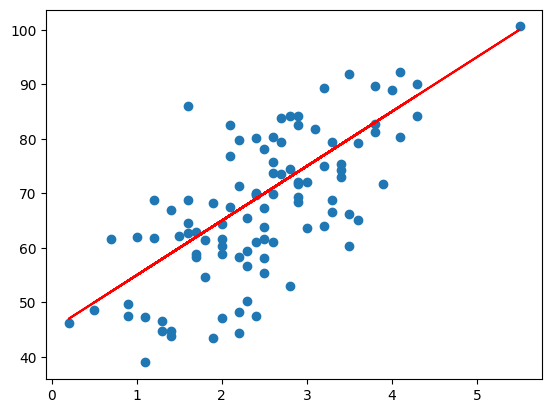

In [46]:
# Write equation for a line
predicted_score = 10 * students.hours_studied + 45

# Create the plot
plt.scatter(students.hours_studied, students.score)
plt.plot(students.hours_studied, predicted_score, "r")
plt.show()

### Finding the "Best" Line

We tried to eye-ball what the best-fit line might look like. In order to actually choose a line, we need to come up with some criteria for what “best” actually means.

A common choice for linear regression is ordinary least squares (OLS). In simple OLS regression, we assume that the relationship between two variables x and y can be modeled as:

$y = mx + b + error$

We define “best” as the line that minimizes the total squared error for all data points. This total squared error is called the loss function in machine learning.

Notice that we square each individual distance so that points below and above the line contribute equally to loss (when we square a negative number, the result is positive). To find the best-fit line, we need to find the slope and intercept of the line that minimizes loss.




### Fitting a Linear Regression Model in Python
There are a number of Python libraries that can be used to fit a linear regression, but in this course, we will use the `OLS.from_formula()` function from `statsmodels.api` because it uses simple syntax and provides comprehensive model summaries.

In [47]:
import statsmodels.api as sm
model = sm.OLS.from_formula("score ~ hours_studied", data = students)
results = model.fit()
print(results.params)

Intercept        43.016014
hours_studied     9.848111
dtype: float64


### Using a Regression Model for Prediction

In [48]:
results.params

Intercept        43.016014
hours_studied     9.848111
dtype: float64

In [49]:
# What is the predicted score for a student who spent 3 hours studying?
pred_3hr = results.params.iloc[1]*3 + results.params.iloc[0]
pred_3hr

72.56034698735529

In [50]:
newdata = {"hours_studied":[5]}
pred_5hr = results.predict(newdata)
print(pred_5hr)

0    92.256569
dtype: float64


### Assumptions of Linear Regression

There are a number of assumptions of simple linear regression, which are important to check if you are fitting a linear model. The first assumption is that the relationship between the outcome variable and predictor is linear (can be described by a line). We can check this before fitting the regression by simply looking at a plot of the two variables.

The next two assumptions (normality and homoscedasticity) are easier to check after fitting the regression. We will learn more about these assumptions in the following exercises, but first, we need to calculate two things: fitted values and residuals.


In [51]:
# fit the model
model = sm.OLS.from_formula('score ~ hours_studied', students)
results = model.fit()

In [52]:
fitted_values = results.predict(students)
fitted_values.head()

0    69.605914
1    83.393269
2    67.636291
3    58.772991
4    56.803369
dtype: float64

In [53]:
residuals = students.score - fitted_values
residuals.head()

0     3.894086
1     8.806731
2   -12.236291
3     5.827009
4    10.096631
dtype: float64

We’ve calculated the fitted values and residuals for a model, we can check the normality and homoscedasticity assumptions of linear regression.

#### Normality Assumption
The normality assumption states that the residuals should be normally distributed. This assumption is made because, statistically, the residuals of any independent dataset will approach a normal distribution when the dataset is large enough.

To check the normality assumption, we can inspect a histogram of the residuals and make sure that the distribution looks approximately normal (no skew or multiple “humps”):

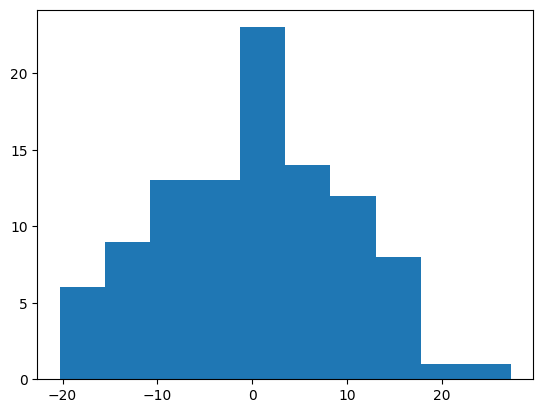

In [54]:
plt.hist(residuals)
plt.show()

#### Homoscedasticity Assumption

Homoscedasticity is a fancy way of saying that the residuals have equal variation across all values of the predictor (independent) variable. When homoscedasticity is not met, this is called heteroscedasticity, meaning that the variation in the size of the error term differs across the independent variable.

Since a linear regression seeks to minimize residuals and gives equal weight to all observations, heteroscedasticity can lead to bias in the results.



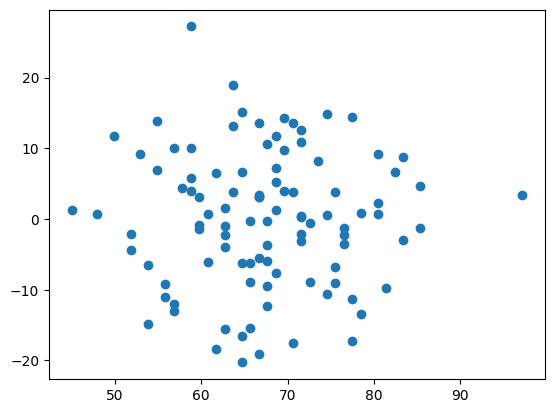

In [55]:
plt.scatter(fitted_values, residuals)
plt.show()

### Categorical Predictors

In the previous blocks, we used a quantitative predictor in our linear regression, but it’s important to note that we can also use categorical predictors. The simplest case of a categorical predictor is a binary variable (only two categories).

In [56]:
students.groupby('breakfast').mean().score

breakfast
0    61.664151
1    73.721277
Name: score, dtype: float64

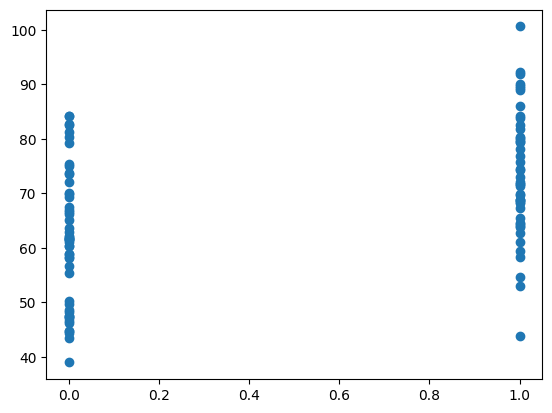

In [57]:
plt.scatter(students.breakfast, students.score)
plt.show()

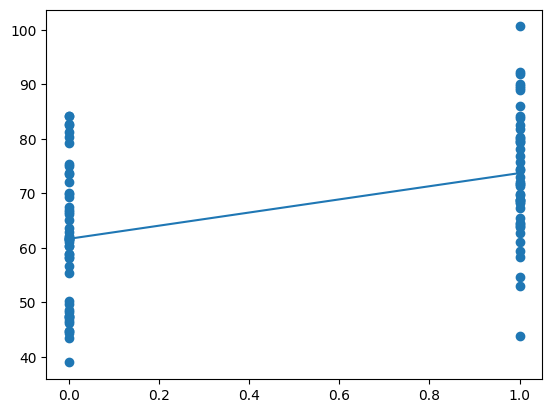

In [58]:
plt.scatter(students.breakfast, students.score)
plt.plot([0,1], [61.664, 73.721])
plt.show()

#### Categorical Predictors: Fit and Interpretation


In [59]:
# Calculate and print group means
mean_score_no_breakfast = np.mean(students.score[students.breakfast == 0])
mean_score_breakfast = np.mean(students.score[students.breakfast == 1])
print('Mean score (no breakfast): ', mean_score_no_breakfast)
print('Mean score (breakfast): ', mean_score_breakfast)

Mean score (no breakfast):  61.664150943396216
Mean score (breakfast):  73.72127659574468


In [60]:
model = sm.OLS.from_formula("score ~ breakfast", students)
results = model.fit()
results.params

Intercept    61.664151
breakfast    12.057126
dtype: float64

In [61]:
mean_score_breakfast - mean_score_no_breakfast

12.057125652348468

### Review

- Fit a simple OLS linear regression model
- Use both quantitative and binary categorical predictors
- Interpret the coefficients of a regression model
- Check the assumptions of a regression model
